Aug 1 - 5

Continue of the work in the matched galaxies in Harris and Atlas catalogs

Find groups of galaxies that:

- Have central galaxies are brightest ones;

- "Central" galaxies aren't the brightest;

- "Central" and other galaxies have roughly similar M_V;



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits

In [4]:
from astropy.table import Table
from astropy.coordinates import Angle

In [5]:
from astropy import units as u
from astropy.coordinates import SkyCoord

In [18]:
#load Harris 13 data 
data_H  = fits.getdata('/data/lemn/datalit/GC_cat_H13.fits')

In [252]:
#load Atlas data 
data_A  = fits.getdata('/data/lemn/Atlas.fits')

In [247]:
#infomation of data in Atlas
hdul = fits.open('/data/lemn/Atlas.fits')
hdul.info()
hdul[0].header[1]
hdul[1].columns

Filename: /data/lemn/Atlas.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    312   145155R x 143C   [19A, 27A, D, D, J, J, J, J, J, J, E, E, 7A, E, I, B, I, 3A, E, E, E, E, E, J, 7E, 7E, I, 7E, 7E, 7E, 7E, 7E, 5E, 7E, E, E, E, E, D, D, 7E, 105E, 105E, 105E, 105E, 105E, 105E, 7E, 7E, 7E, 7E, E, E, E, E, 7E, 7E, E, E, E, 7E, 7E, 7J, J, J, 8A, 15E, E, E, E, E, J, J, J, J, 7E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, D, D, E, 6A, 23A, 8A, J, D, D]   


ColDefs(
    name = 'IAUNAME'; format = '19A'
    name = 'SUBDIR'; format = '27A'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'ISDSS'; format = 'J'
    name = 'INED'; format = 'J'
    name = 'ISIXDF'; format = 'J'
    name = 'IALFALFA'; format = 'J'
    name = 'IZCAT'; format = 'J'
    name = 'ITWODF'; format = 'J'
    name = 'MAG'; format = 'E'
    name = 'Z'; format = 'E'
    name = 'ZSRC'; format = '7A'
    name = 'SIZE'; format = 'E'
    name = 'RUN'; format = 'I'
    name = 'CAMCOL'; format = 'B'
    name = 'FIELD'; format = 'I'
    name = 'RERUN'; format = '3A'
    name = 'XPOS'; format = 'E'
    name = 'YPOS'; format = 'E'
    name = 'ZLG'; format = 'E'
    name = 'ZDIST'; format = 'E'
    name = 'ZDIST_ERR'; format = 'E'
    name = 'NSAID'; format = 'J'
    name = 'NMGY'; format = '7E'
    name = 'NMGY_IVAR'; format = '7E'
    name = 'OK'; format = 'I'
    name = 'RNMGY'; format = '7E'
    name = 'ABSMAG'; format = '7E'
    name = 'AMIVAR'; format = 

In [248]:
#Hubble parameter
h = 0.67

In [253]:
#All absolute magnitudes are given with H0 = 100 h km s-1 Mpc-1, so should be interpreted as M - 5 log10 h
#Absolute magnitude estimates for FNugriz from K-corrections (Ωm=0.3, ΩΛ=0.7, h=1)
Mag_A = data_A['ABSMAG']
print(Mag_A)

[[-15.1673565 -15.816648  -17.190884  ... -19.66704   -20.00378
  -20.296247 ]
 [-15.458004  -15.936071  -16.966635  ... -18.400158  -18.55086
  -18.714317 ]
 [-12.267342  -12.706323  -14.098556  ... -15.508064  -15.679038
  -15.738412 ]
 ...
 [ -7.6111817  -8.024739   -9.467075  ... -11.802738  -12.302913
  -12.68998  ]
 [ -6.642025   -6.7601223  -9.260235  ... -10.290306  -11.488373
  -11.717308 ]
 [-11.586867  -11.616354  -13.559221  ... -11.997535  -12.160889
  -12.567671 ]]


In [254]:
Mag_A += 5*np.log10(h)
print(Mag_A)

[[-16.036982  -16.686274  -18.060509  ... -20.536665  -20.873405
  -21.165873 ]
 [-16.32763   -16.805696  -17.83626   ... -19.269783  -19.420485
  -19.583942 ]
 [-13.136968  -13.575949  -14.968182  ... -16.37769   -16.548664
  -16.608038 ]
 ...
 [ -8.480807   -8.894365  -10.336701  ... -12.672364  -13.172539
  -13.559606 ]
 [ -7.511651   -7.6297483 -10.129861  ... -11.159932  -12.357999
  -12.586934 ]
 [-12.456493  -12.48598   -14.428847  ... -12.867161  -13.030515
  -13.437297 ]]


In [19]:
#load M_V from Harris catalog
Mag_H = data_H['Abs Mag']

In [21]:
m_stellar = data_A['MASS']
r_pe      = data_A['PETROTHETA']

In [20]:
N_GC = data_H['NGCs']

In [22]:
#coordinates of Atlas catalog
c_Atlas = SkyCoord(ra=data_A['RA']*u.degree, dec=data_A['DEC']*u.degree, frame='icrs')

In [23]:
#coordinates of Harris13 catalog
c_Harris = SkyCoord(ra=data_H['RA']*u.degree, dec=data_H['DEC']*u.degree, frame='icrs') #since ra_H now is the value->multiplied to unit

In [230]:
#source.match_to_catalog_sky(catalog)
idx, d2d, d3d = c_Harris.match_to_catalog_sky(c_Atlas)

In [231]:
d2d = d2d.arcsec #convert d2d to [arcsec], then take the value and remove the unit
#print(d2d)

In [232]:
i_count = len(idx)
print('total number of galaxies in Harris', i_count)
for i in range (0, len(idx)):
    if (d2d[i] > r_pe[i]):
        idx[i] = -1   #remotve the matches that larger than petrosian radius of galaxies
        i_count -= 1
print(idx)
print('total number of matched galaxies is', i_count)

total number of galaxies in Harris 418
[    -1 112939     -1     -1     -1 114192 114303 114305     -1     -1
     -1     -1 115241     -1 115775 116080 116190 116462     -1     -1
 116953     -1     -1     -1     -1     -1     -1     -1     -1     -1
 118591     -1 118810     -1     -1     -1     -1     -1 119413     -1
     -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
     -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
     -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
     -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
     -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
     -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
     -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
     -1     -1     -1     -1     -1     -1     -1     -1     -1     -1
     -1     -1     -1     -1  74602 138271     -1 121417     -1     -1
     -1 121562 121572 121653     -1   

In [233]:
idx_match_in_A = np.flatnonzero(idx != -1)

In [27]:
for i in range(0,len(idx)):
    for j in range(i+1,len(idx)):
        if i!=j and idx[i] != -1 and idx[j] != -1 and idx[i] == idx[j]:
            print (i,j)
#=> the two look like they are going to merge

383 384


In [28]:
#take the stellar mass from Atlas catalog
N_GC_match      = np.zeros(i_count)
m_stellar_match = np.zeros(i_count)
ii = 0

for i in range (0, len(idx)):
    if (idx[i] != -1):
        N_GC_match[ii]      = N_GC[i]
        m_stellar_match[ii] = m_stellar[idx[i]]
        ii += 1

In [29]:
ra_H = data_H['RA']
dec_H = data_H['DEC']

ra_match     = np.zeros(i_count)
dec_match    = np.zeros(i_count)
id_match     = np.zeros(i_count)  #Harris ID of matching galaxies

ii = 0

for i in range (0, len(idx)):
    if (idx[i] != -1):
        ra_match[ii]  = ra_H[i]
        dec_match[ii] = dec_H[i]
        id_match[ii]  = i      
        ii += 1

In [31]:
#now follow Moster13 to find M_halo of the galaxies
from scipy.optimize import fsolve 

In [32]:
#Paramters adopted from Moster et al. 13, table 1
M_10     = 11.59
M_11     = 1.195
N_10     = 0.0351
N_11     = -0.0247
beta_10  = 1.376               
beta_11  = -0.826
gamma_10 = 0.608
gamma_11 = 0.329

In [33]:
#calculate the parameters(z) for SHM relation
z = 0

log_M1 = M_10 + M_11*z/(z+1)
M_1    = 10**log_M1
NN     = N_10 + N_11*z/(z+1)
beta   = beta_10 + beta_11*z/(z+1)
gamma  = gamma_10 + gamma_11*z/(z+1)

print(np.log10(M_1),NN*2,beta,gamma)

11.59 0.0702 1.376 0.608


In [34]:
i = 0
M_guess = 1e10
M_h_array = np.zeros(i_count)

for m in m_stellar_match:
    func = lambda M_h : m - 2*NN*M_h/((M_h/M_1)**(-beta) + (M_h/M_1)**gamma)  
    M_h_array[i] = fsolve(func,M_guess)
    i += 1    
#print(M_h_array)

Text(0.5, 1.0, 'm_stellar(M_halo) compare to Fig.1 in Moster13')

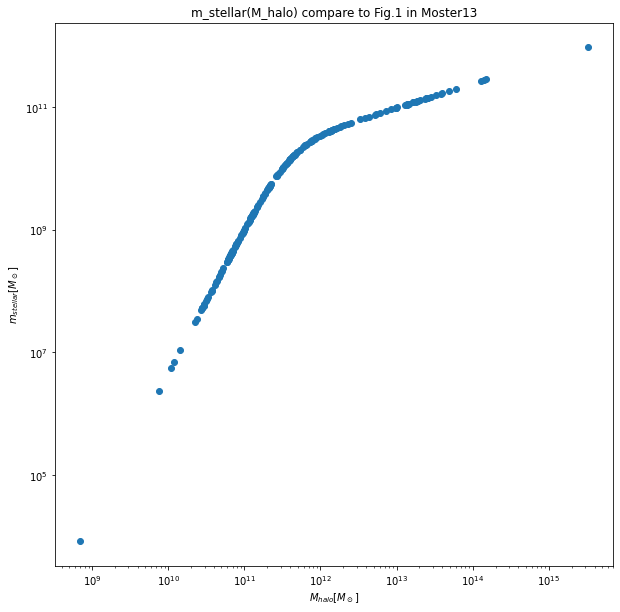

In [35]:
# compare the result to Harris catalog (all GCs)
plt.figure(figsize=[10,10])
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel("$m_{stellar} [M_\odot]$")
ax.set_xlabel("$M_{halo} [M_\odot]$")    
ax.scatter( M_h_array,m_stellar_match)
ax.set_title('m_stellar(M_halo) compare to Fig.1 in Moster13')

In [36]:
#for only the NGC4377
m = 10**9.84  #taken from Lehmar 2020
func = lambda M_h : m - 2*NN*M_h/((M_h/M_1)**(-beta) + (M_h/M_1)**gamma)  
M_h_test = fsolve(func,1e10)

print(np.log10(M_h_test))
#M_h is different from one calculated by matching+Moster 

[11.40410493]


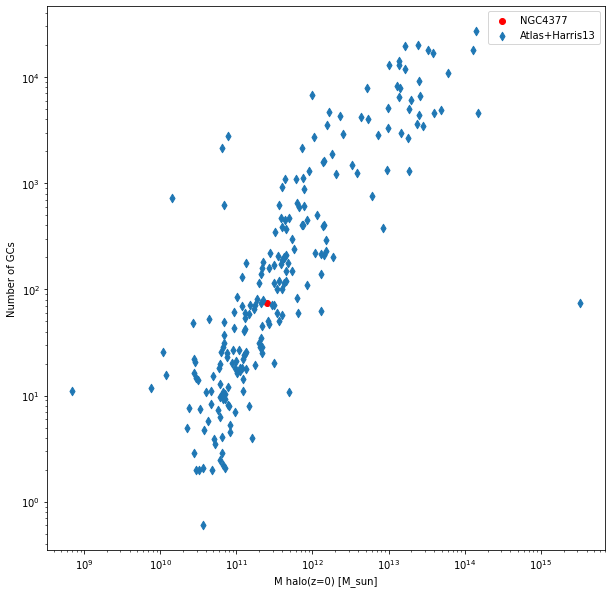

In [37]:
# compare the result to Harris catalog (all GCs)
plt.figure(figsize=[10,10])
ax = plt.axes()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("M halo(z=0) [M_sun]")
ax.set_ylabel("Number of GCs")    
ax.scatter(M_h_test, N_GC_match[75], color='r', label ='NGC4377')
ax.scatter(M_h_array, N_GC_match, marker='d', label ='Atlas+Harris13')
ax.legend()

In [38]:
#found the most massive halo (>1e15 M_sun) but has N_GC ~ 100
for i in range(0,i_count):
    if (M_h_array[i] > 1e15 and N_GC_match[i]<200):
        print(i,', halo mass:' , M_h_array[i]/1e15,'*1e15 M_sun, number of GC:', N_GC_match[i])


75 , halo mass: 3.2523147318264884 *1e15 M_sun, number of GC: 74.0


In [43]:
#correct the wrong matching galaxy
no = np.argmax(M_h_array)
print(no)
M_h_array[no] = 2.51189e11
m_stellar_match[no] = 10**9.84
#print(M_h)

75


In [39]:
#Find R_vir from M_vir
def rvirial_from_mvirial(mv,cosmology,rho_virial=200.0,z=0.0):
    """
    mv:         virial mass (Msol)
    cosmology:  astropy.cosmology object
    rho_virial: overdensity of a virialized halo, rel. to rho_crit (default 200)
    z:          redshift
    
    Returns: virial radius (Mpc)
    """ 
    import numpy as np
    import astropy.units as u

    rho_crit = cosmology.critical_density(z)
    
    return ((mv/((4.0/3.0)*np.pi*rho_virial*rho_crit))**(1.0/3.0)).to(u.Mpc)

In [40]:
import astropy.cosmology as cosmo
import astropy.units as u
lcdm = cosmo.FlatLambdaCDM(70,0.3)

rvirial_from_mvirial(1e15*u.Msun,lcdm)

<Quantity 2.06278993 Mpc>

In [127]:
def distance_to_central(ra_cen,dec_cen,ra_sat,dec_sat):
    return np.sqrt((ra_cen-ra_sat)**2+(dec_cen-dec_sat)**2)

In [183]:
r_vir = np.zeros(len(M_h_array))*u.Mpc
for i in range(0,len(M_h_array)):
    r_vir[i] = rvirial_from_mvirial(M_h_array[i]*u.Msun,lcdm)

In [178]:
r_vir2 = r_vir

In [179]:
i = 0
check = np.zeros(len(r_vir2)) #check if it is single galaxy(no satelite)= 0; if it has satelite = 1, if it is satelite = idx of the central gal
while (np.any(r_vir2 != 0) == True):
    cen = np.argmax(r_vir2) #find the maximum r_vir
    #print('cen is ', cen)
    for ii in range(0,len(r_vir2)):
        #considered satelite gal if distance to central is smaller than virial radius of central, r_vir != 0 to make sure it is only sat of 1 group
        if ii != cen and r_vir2[ii] != 0 and distance_to_central(ra_match[cen],dec_match[cen],ra_match[ii],dec_match[ii])*u.Mpc < r_vir2[cen]:
            #print('satelites are:', ii)
            check[cen] = 1
            check[ii]  = cen
            r_vir2[ii] = 0   #remove it out of considered list
    r_vir2[cen] = 0          #remove it out of considered list
    i += 1
    #print('next group')

In [180]:
print(check)

[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.
  27.   0.   0.   0.   0.   0.   0.   0.   1.  36.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  69.   1.
   0.   0.  77.   0.   1.   0.   0.   1.  74.   0.   0.   0.   0.   0.
   0.   0.   0.  89.   0.   1.   0.  89.   0.   0.   0.   0.   0.   0.
   0.   0. 104.   0.   0. 115.   1.   0. 115.   0. 104. 115. 104. 115.
   0.   0.   0.   1.   0.   0.   0.   0. 115.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 138.   1.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0. 164.   0.   0.   1.   0.   0.   0.
   0.   0.   0.   1. 171.   1. 173. 183. 183. 183. 183. 183. 183. 183.
 183.   1. 183. 183. 183. 183. 183. 183.   0.   0.   0.   0.   0. 196.
   1. 

In [219]:
#now check if the central galaxies contain other galaxies (which is in the Harris but not matched to Atlas)
#by take it idx and compare the distance from other galaxies to it with its halo virial radius
#idx of this central in Harris catalog

cen1 = np.flatnonzero(check==1)
cen = id_match[cen1]
print('total central galaxies are', len(cen))

total central galaxies are 19


In [262]:
#check with other gals not matched, in H; 
i_dim = 0
for i in range (0,len(cen)):
    idx = int(cen[i])
    idx1 = int(cen1[i]) #since only the list cen1 has r_vir
    for j in range(0,len(ra_H)):
        if j != idx and distance_to_central(ra_H[idx],dec_H[idx],ra_H[j],dec_H[j])*u.Mpc < r_vir[idx1]:
            #print('central', idx ,' satelite:', j)
            if Mag_H[j] <= Mag_H[idx]: #check if satelite is brighter than central
                i_dim +=1
                print('central', idx, Mag_H[idx] ,'is dimmer than satelite:', j, Mag_H[j])
                check[idx1] = 1.5 #denote that this "central" is dimmer than its "satelite"
#print('#central galaxies that are dimmer than their satelites are', i_dim)

central 292 -19.15 is dimmer than satelite: 290 -19.39
central 330 -20.53 is dimmer than satelite: 331 -21.7
central 332 -22.25 is dimmer than satelite: 334 -23.16
central 343 -23.47 is dimmer than satelite: 339 -23.48


In [263]:
print(check)

[  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    1.   27.    0.    0.    0.    0.    0.    0.    0.
   1.   36.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.   69.    1.    0.    0.
  77.    0.    1.    0.    0.    1.   74.    0.    0.    0.    0.    0.
   0.    0.    0.   89.    0.    1.    0.   89.    0.    0.    0.    0.
   0.    0.    0.    0.  104.    0.    0.  115.    1.    0.  115.    0.
 104.  115.  104.  115.    0.    0.    0.    1.    0.    0.    0.    0.
 115.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.  138.    1.5   0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.  164.    0.    0.    1.    0.    0

In [228]:
#single galaxy
single1 = np.flatnonzero(check==0)
print(single1)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  29  30  31  32  33  34  35  38  39
  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  70  71  73  75  76  79  80  81
  82  83  84  85  86  88  90  92  93  94  95  96  97  98  99 101 102 105
 107 112 113 114 116 117 118 119 121 122 123 124 125 126 127 128 129 130
 131 132 133 134 135 136 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 162 163 165 166 167 168 169 170
 190 191 192 193 194 197 198 199 200 201 208 210 212 213 216 217 218 219]


In [269]:
#sum up all the GCs inside same halos
sum_NGC = np.zeros(len(check))
for i in range(0,len(check)):
    ii = int(id_match[i])    #real id in Harris catalog
    if check[i] == 1 or check[i] == 1.5: #sum up the number of GCs in DM halos which have true and "fake" centrals
        sum_NGC[i] = N_GC[ii]
        for j in range(0,len(ra_H)):
            if j != ii and distance_to_central(ra_H[ii],dec_H[ii],ra_H[j],dec_H[j])*u.Mpc < r_vir[i]:
                sum_NGC[i] += N_GC[j]
    elif check[i] == 0:  #for single galaxies
        sum_NGC[i] = N_GC[ii]
#=> final results are the sum_NGC vs M_h_array

Plot the results together with previous results

In [255]:
#load theory results
M_halo_theo                 = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(0))
N_GC_Mill_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(1))
err_N_GC_Mill_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(2))
N_GC_Planck_Creaseytheo     = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(3))
err_N_GC_Planck_Creaseytheo = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(4))
N_GC_COCO_Creaseytheo       = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(5))
err_N_GC_COCO_Creaseytheo   = np.loadtxt("/data/lemn/theory_results/theory_Creaseymodel.txt" ,usecols=(6))
M_halo_theo2                = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(0))
N_GC_Mill_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(1))
err_N_GC_Mill_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(2))
N_GC_Planck_ourtheo         = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(3))
err_N_GC_Planck_ourtheo     = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(4))
N_GC_COCO_ourtheo           = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(5))
err_N_GC_COCO_ourtheo       = np.loadtxt("/data/lemn/theory_results/theory_ourmodel.txt"     ,usecols=(6))

In [256]:
#load data from Forbes et al.18
M_halo_F = np.loadtxt('/data/lemn/datalit/Forbes18_data.txt',usecols=(2))
N_GC_F   = np.loadtxt('/data/lemn/datalit/Forbes18_data.txt',usecols=(3))
M_halo_F = 10**M_halo_F

In [257]:
# load EMOSAICS Fig.1 data
mass_E   = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(0))
triangle = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(1))
square   = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(2))
star     = np.loadtxt('/data/lemn/datalit/EMOSAICS_data.txt', usecols =(3))

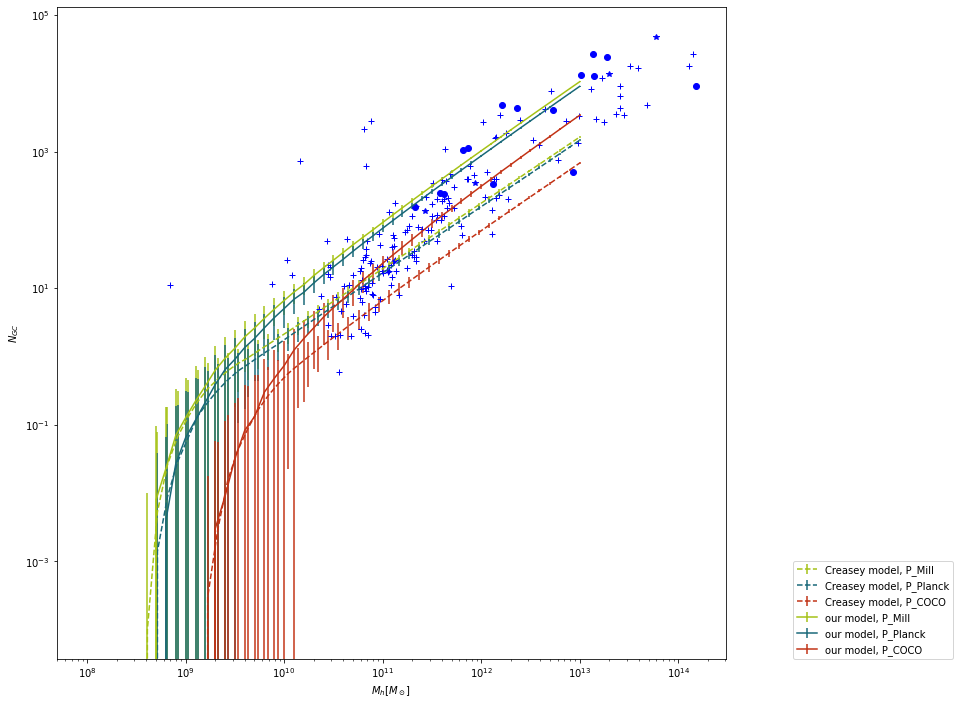

In [291]:
plt.figure(figsize=(12,12))
plt.xscale("log")
plt.yscale("log")
plt.errorbar(M_halo_theo, N_GC_Mill_Creaseytheo,  yerr=err_N_GC_Mill_Creaseytheo,  color = '#a5c215', fmt='--',label='Creasey model, P_Mill')
plt.errorbar(M_halo_theo, N_GC_Planck_Creaseytheo,yerr=err_N_GC_Planck_Creaseytheo,color = '#186878', fmt='--',label='Creasey model, P_Planck')
plt.errorbar(M_halo_theo, N_GC_COCO_Creaseytheo,  yerr=err_N_GC_COCO_Creaseytheo,  color = '#c23215', fmt='--',label='Creasey model, P_COCO')
plt.errorbar(M_halo_theo2,N_GC_Mill_ourtheo,      yerr=err_N_GC_Mill_ourtheo,      color = '#a5c215',label='our model, P_Mill')
plt.errorbar(M_halo_theo2,N_GC_Planck_ourtheo,    yerr=err_N_GC_Planck_ourtheo,    color = '#186878',label='our model, P_Planck')
plt.errorbar(M_halo_theo2,N_GC_COCO_ourtheo,      yerr=err_N_GC_COCO_ourtheo,      color = '#c23215',label='our model, P_COCO')

plt.plot(M_halo_F,  N_GC_F,'m+', label = 'GCs in central halo (Forbes18)')
plt.plot(mass_E, triangle, 'v-', label = 'EMOSAICS $M \geq 10^5 M_\odot$')
plt.plot(mass_E, square,   's-', label = 'EMOSAICS $M \geq 10^5 M_\odot$ and $[Fe/H]$')
#plt.plot(mass_E, star, '*-',     label = 'EMOSAICS $M \geq 10^5 M_\odot$, $[Fe/H]$ and $R > R_{1/2 M_\star}$')
for i in range(0,len(check)):
    if check[i] == 1:
        plt.plot(M_h_array[i],sum_NGC[i], 'bo')#, label = '#GCs in halos, true cen')
    elif check[i] == 1.5:
        plt.plot(M_h_array[i],sum_NGC[i], 'b*')#, label = '#GCs in halos, fake cen')
    elif check[i] == 0:
        plt.plot(M_h_array[i],sum_NGC[i], 'b+')#, label = '#GCs in halos, single gal')
plt.xlabel('$M_h [M_\odot]$')
plt.ylabel('$N_{GC}$')
plt.legend(loc=(1.1,0))
plt.show()
#plt.savefig('tot_GC.png')

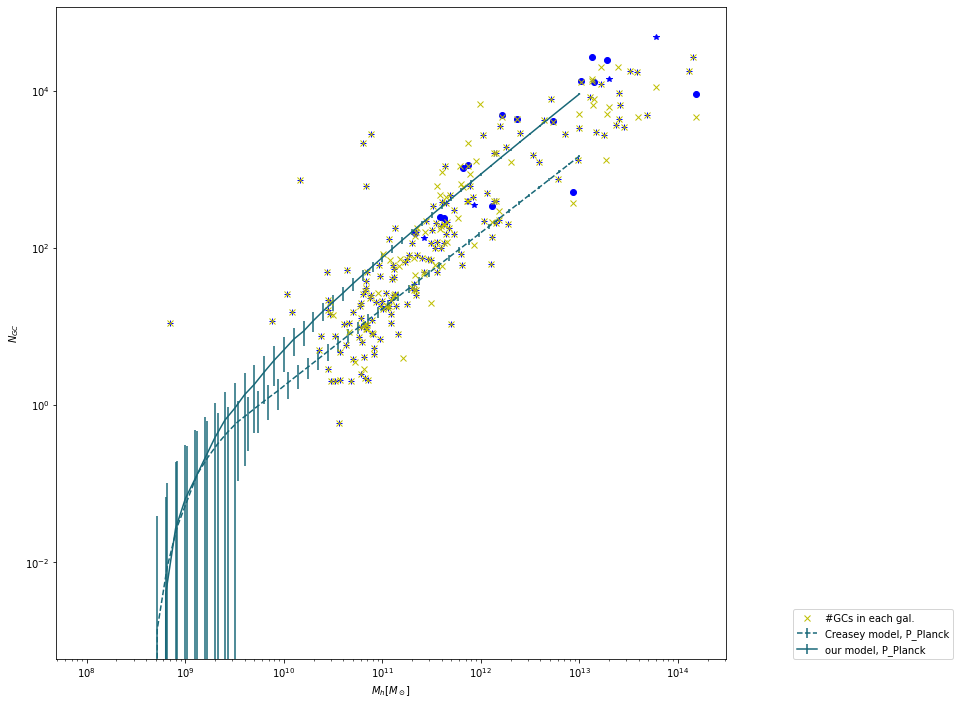

In [292]:
plt.figure(figsize=(12,12))
plt.xscale("log")
plt.yscale("log")
#plt.errorbar(M_halo_theo, N_GC_Mill_Creaseytheo,  yerr=err_N_GC_Mill_Creaseytheo,  color = '#a5c215', fmt='--',label='Creasey model, P_Mill')
plt.errorbar(M_halo_theo, N_GC_Planck_Creaseytheo,yerr=err_N_GC_Planck_Creaseytheo,color = '#186878', fmt='--',label='Creasey model, P_Planck')
#plt.errorbar(M_halo_theo, N_GC_COCO_Creaseytheo,  yerr=err_N_GC_COCO_Creaseytheo,  color = '#c23215', fmt='--',label='Creasey model, P_COCO')
#plt.errorbar(M_halo_theo2,N_GC_Mill_ourtheo,      yerr=err_N_GC_Mill_ourtheo,      color = '#a5c215',label='our model, P_Mill')
plt.errorbar(M_halo_theo2,N_GC_Planck_ourtheo,    yerr=err_N_GC_Planck_ourtheo,    color = '#186878',label='our model, P_Planck')
#plt.errorbar(M_halo_theo2,N_GC_COCO_ourtheo,      yerr=err_N_GC_COCO_ourtheo,      color = '#c23215',label='our model, P_COCO')

#plt.plot(M_halo_F,  N_GC_F,'m+', label = 'GCs in central halo (Forbes18)')
#plt.plot(mass_E, triangle, 'v-', label = 'EMOSAICS $M \geq 10^5 M_\odot$')
#plt.plot(mass_E, square,   's-', label = 'EMOSAICS $M \geq 10^5 M_\odot$ and $[Fe/H]$')
#plt.plot(mass_E, star, '*-',     label = 'EMOSAICS $M \geq 10^5 M_\odot$, $[Fe/H]$ and $R > R_{1/2 M_\star}$')
for i in range(0,len(check)):
    if check[i] == 1:
        plt.plot(M_h_array[i],sum_NGC[i], 'bo')#, label = '#GCs in halos, true cen')
    elif check[i] == 1.5:
        plt.plot(M_h_array[i],sum_NGC[i], 'b*')#, label = '#GCs in halos, fake cen')
    elif check[i] == 0:
        plt.plot(M_h_array[i],sum_NGC[i], 'b+')#, label = '#GCs in halos, single gal')
        
plt.plot(M_h_array,N_GC_match,'yx', label='#GCs in each gal.')
plt.xlabel('$M_h [M_\odot]$')
plt.ylabel('$N_{GC}$')
plt.legend(loc=(1.1,0))
plt.show()
#plt.savefig('tot_GC.png')